In [1]:
import numpy as np
import matplotlib.pyplot as plt

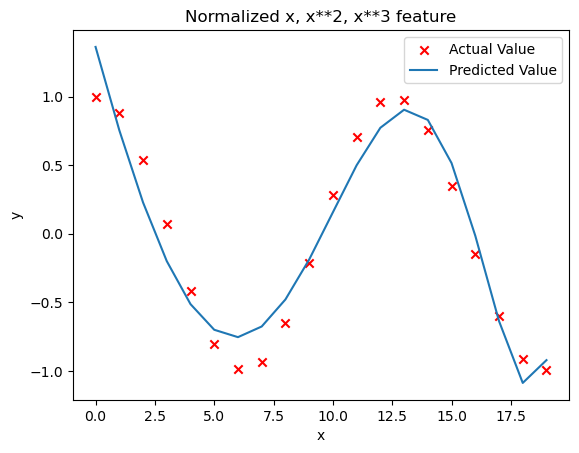

In [4]:
# Function to normalize features
def zscore_normalize_features(X):
    """Z-score normalization for the features."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Function to run gradient descent
def run_gradient_descent_feng(X, y, iterations, alpha):
    """Performs gradient descent."""
    m, n = X.shape
    w = np.zeros(n) #initializes the weights for the features to zero
    b = 0 #initializes the bias term b to zero

    for i in range(iterations):
        # Compute predictions
        predictions = X @ w + b #calculates predictions; @ operator performs matrix multiplication
        # Compute gradients
        error = predictions - y 
        grad_w = (1/m) * (X.T @ error) #can rewrite normal dj_dw equation as this in matrix form (transpose)
        #grad_w is the vector of gradients for all weights; each element of grad_w corresponds to the slope of the error with respect to a particular weight; by substracting alpha * grad_w from the weights, we move closer to the optimal weights that minimise the error
        
        grad_b = (1/m) * np.sum(error) #as for b, the dj_db term is simply the error (no extra X)
        # Update weights and bias
        w -= alpha * grad_w #another way to update rates: subtract learning rate alpha * gradient
        b -= alpha * grad_b

    return w, b #return the optimized weights and bias after all iterations

# Data
x = np.arange(0, 20, 1) #creates an array of numbers from 0 to 19 (step of 1)
y = np.cos(x/2)  #define relationship between x and y

# Prepare features
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13] #creates a 2D array (for storage?) where column 1 is x, column 2 is x**2, and column 3 is x***3
X = zscore_normalize_features(X) #normalizes the features using the previously defined function

# Run gradient descent
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1) #stores optimized weights and bias returned by gradient descent fn

# Plotting
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x, x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
